<a href="https://colab.research.google.com/github/ManavBansal/Vyntelligence/blob/master/src/testingHeight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Step1**: Upload image on drive
#### **Step2**: Get ID from the sharable link of image
###### For example: In this link, https://drive.google.com/file/d/1wBDiN1fkvKdPIGDu7OU3Xan6ROnnsVCG/view?usp=sharing
Has ID = 1wBDiN1fkvKdPIGDu7OU3Xan6ROnnsVCG"

#### **Step3**:  Assign that ID to the below variable "id"
(while copying the id make sure to change the option from "Restricted" view to "Anyone with the link" can view )

In [16]:
id = "1CN78-dBSnWuYgZb8hGIijamFmk6W7oK-"

### Just run the below *blocks*

In [17]:
import requests

In [18]:
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [19]:
from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils

In [20]:
download_file_from_google_drive("1-3cNvtETU_GedGr7vPo8qjOWeVGNzorG","\myModel.h5")
def focal_loss(y_true, y_pred):
    gamma = 2.0
    alpha = 0.25
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
model=models.load_model("\myModel.h5",custom_objects={'focal_loss':focal_loss})

(2448, 3264, 3)


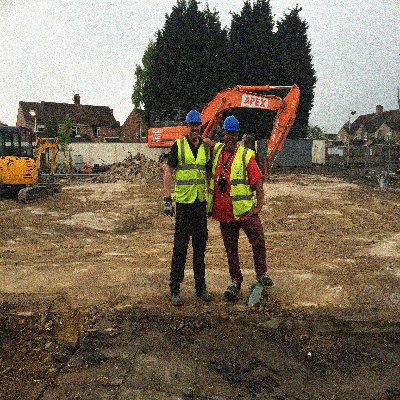

not_height, Probability 0.9948061


In [24]:
download_file_from_google_drive(id,"\test_image.jpg")
img = cv2.imread("\test_image.jpg",cv2.IMREAD_UNCHANGED)
print(img.shape)
#cv2_imshow(img)
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
img = cv2.resize(img, (400, 400), interpolation=cv2.INTER_CUBIC)
cv2_imshow(img)
image = img_to_array(img)
image = np.expand_dims(image, axis=0)
preds = model.predict(image)
class_=np.argmax(preds[0])
if(class_==0):
  label="not_height"    
elif class_==1:    
  label="height"
else:
  label="hard"

print(label + ", Probability " + str(preds[0][class_]))

   